In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [132]:
df = pd.read_csv("glass.csv")

## Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [133]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [134]:
df.shape

(214, 10)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Observations
1. There are 214 rows and 10 columns.
2. There are float64(9) and int64(1).
3. 1 feature i.e. Type seems to be Categorical.

# Change the Dtype to Categorical

In [136]:
df['Type'] = pd.Categorical(df['Type'])

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


### Observations
1. All the features have 214 rows and no null values.
2. Al, K, Ca, Ba seems to have Outliers( needs further analysis ).
3. Anomalies and Bad data not observed.

## Checking for duplicate data

In [139]:
dups = df.duplicated()
print(f"Number of duplicate rows are: {dups.sum()}")

Number of duplicate rows are: 1


In [140]:
df[dups]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [141]:
df.drop_duplicates(inplace = True)

In [142]:
dups = df.duplicated()
print(f"Number of duplicate rows are: {dups.sum()}")
df[dups]

Number of duplicate rows are: 0


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      213 non-null    float64 
 1   Na      213 non-null    float64 
 2   Mg      213 non-null    float64 
 3   Al      213 non-null    float64 
 4   Si      213 non-null    float64 
 5   K       213 non-null    float64 
 6   Ca      213 non-null    float64 
 7   Ba      213 non-null    float64 
 8   Fe      213 non-null    float64 
 9   Type    213 non-null    category
dtypes: category(1), float64(9)
memory usage: 17.1 KB


# Checking for Outliers

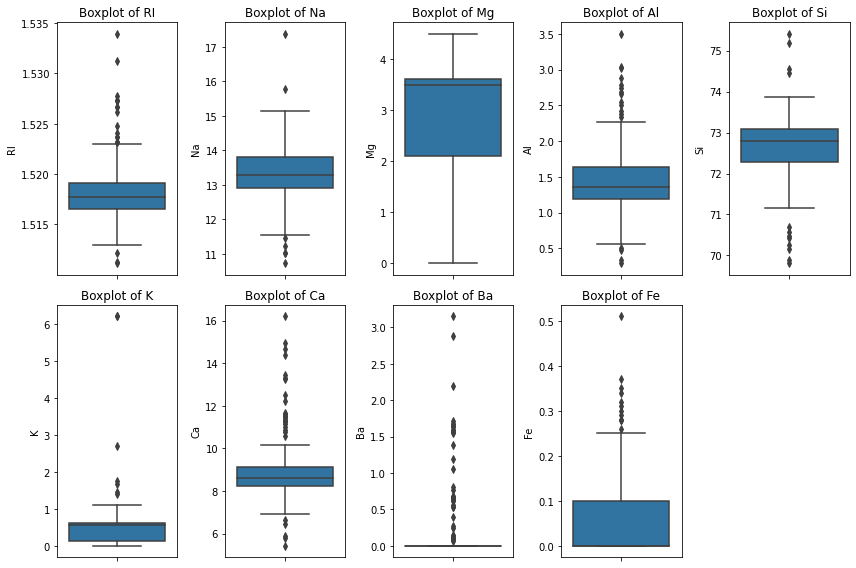

In [144]:
plt.figure(figsize = (12,8))
Features = df.select_dtypes(include=np.number).columns.tolist()
for i in range(len(Features)):
    plt.subplot(2,5, i + 1)
    sns.boxplot(y = df[Features[i]], data = df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

### Observations
1. All the features except Mg has 
2. Medians is also out of place.

#### Treating Outliers

In [145]:
def remove_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [146]:
Feature_list = df.select_dtypes(include=np.number).columns.tolist()
for i in Feature_list:
    lr, ur = remove_outliers(df[i])
    df[i] = np.where(df[i] > ur, ur,df[i])
    df[i] = np.where(df[i] < lr, lr,df[i])

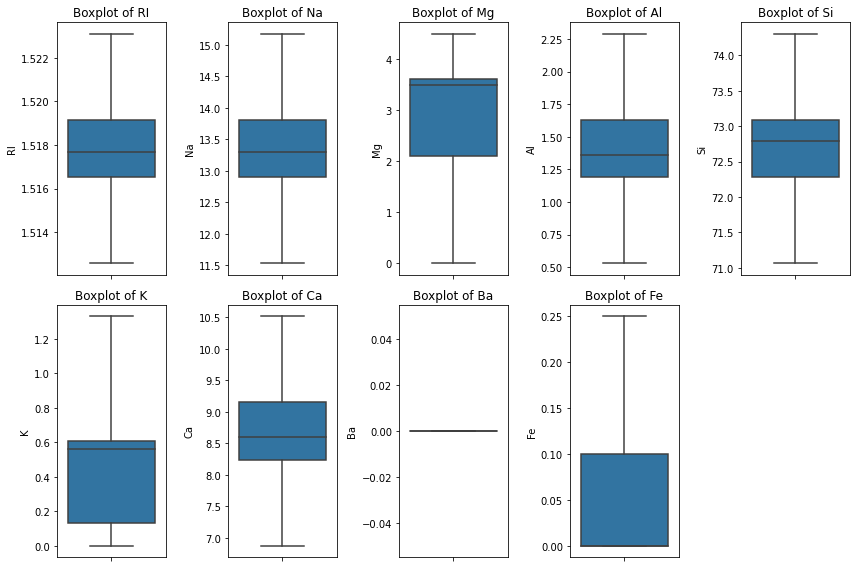

In [147]:
plt.figure(figsize = (12,8))
Features = df.select_dtypes(include=np.number).columns.tolist()
for i in range(len(Features)):
    plt.subplot(2,5, i + 1)
    sns.boxplot(y = df[Features[i]], data = df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

# Treating Missing values

In [148]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Since there is no missing values in df, hence treating it is not required.

# Scalling of data

We need to first find out if our data is normally distributed or not

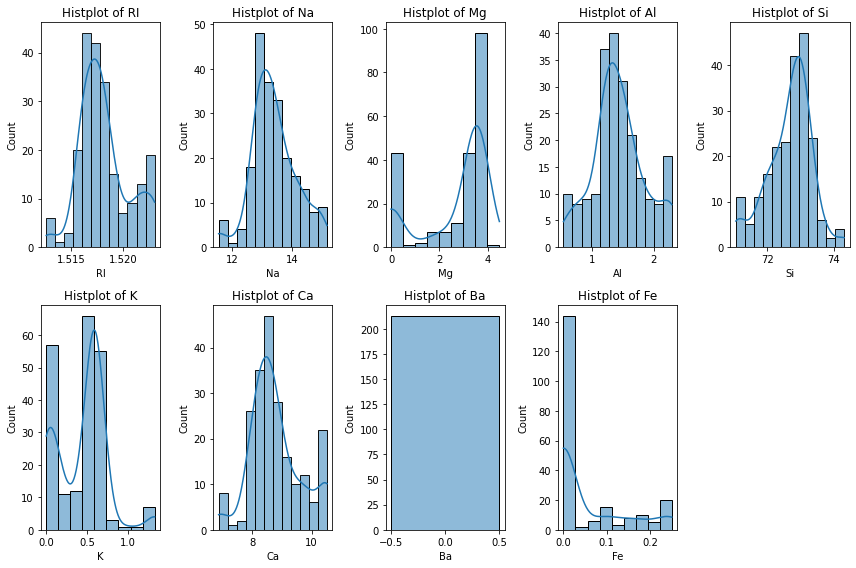

In [149]:
Feature_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize = (12,8))
for i in range(0,len(Feature_list)):
    plt.subplot(2, 5, i + 1)
    sns.histplot(data = df, x = Feature_list[i], kde = True);
    plt.title(f"Histplot of {Feature_list[i]}")
    plt.tight_layout()   

In [150]:
# Analysing Ba feild
df['Ba'].describe()

count    213.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Ba, dtype: float64

In [151]:
df['Ba'].unique()

array([0.])

We can see that, all values of Ba is 0, hence the feild can be dropped

In [152]:
df.drop('Ba', axis = 1, inplace = True)

**As most of the feilds are approx normally distributed, hence Scalling with Zscore**

In [153]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Intilizing object of StandardScaler
zscore = StandardScaler()

# Fitting the StandardScaler object with the dataset

Features = df[df.columns.difference(['Type'])].columns

for i in range(0, len(Features)):
    df[Features[i]] = zscore.fit_transform(df[Features[i]].values.reshape(-1,1))

 
# Scalling the data sets using the fitted StandardScaler object
#df_scaled= pd.DataFrame(zscore.transform(df[df.columns.difference(['Type'])]),columns = df[df.columns.difference(['Type'])].columns)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      213 non-null    float64 
 1   Na      213 non-null    float64 
 2   Mg      213 non-null    float64 
 3   Al      213 non-null    float64 
 4   Si      213 non-null    float64 
 5   K       213 non-null    float64 
 6   Ca      213 non-null    float64 
 7   Fe      213 non-null    float64 
 8   Type    213 non-null    category
dtypes: category(1), float64(8)
memory usage: 15.4 KB


In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,213.0,-2.343926e-14,1.002356,-2.364565,-0.689912,-0.197492,0.426523,2.101176
Na,213.0,-7.526582e-16,1.002356,-2.522239,-0.677434,-0.136832,0.552436,2.397240
Mg,213.0,-3.544374e-17,1.002356,-1.860172,-0.409083,0.555995,0.639311,1.257238
Al,213.0,5.712697e-16,1.002356,-2.131375,-0.559594,-0.154741,0.488261,2.060042
Si,213.0,1.956703e-15,1.002356,-2.450678,-0.599121,0.178076,0.635251,2.486808
K,213.0,3.023143e-16,1.002356,-1.450441,-1.023814,0.387339,0.551426,2.914287
Ca,213.0,-6.994926e-16,1.002356,-2.227803,-0.638300,-0.219090,0.421369,2.010872
Fe,213.0,-1.793036e-16,1.002356,-0.621102,-0.621102,-0.621102,0.548612,2.303183


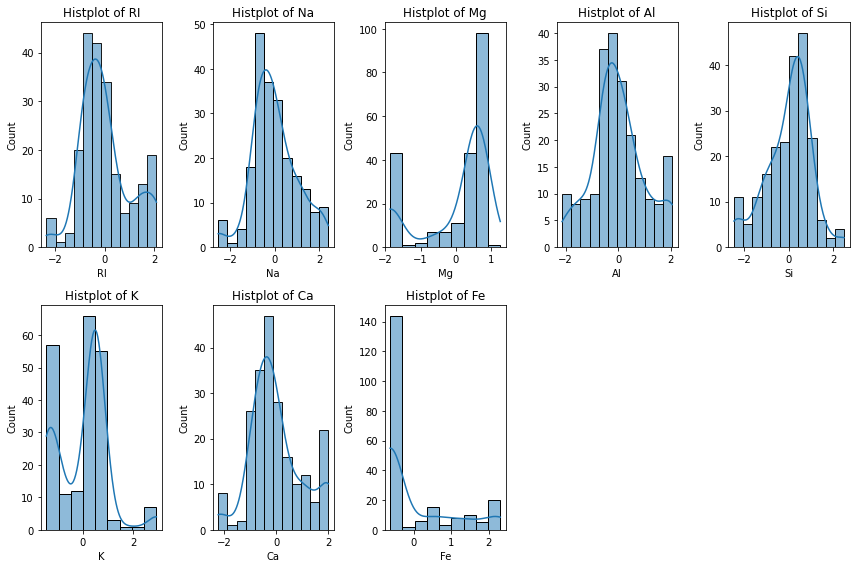

In [110]:
Feature_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize = (12,8))
for i in range(0,len(Feature_list)):
    plt.subplot(2, 5, i + 1)
    sns.histplot(data = df, x = Feature_list[i], kde = True);
    plt.title(f"Histplot of {Feature_list[i]}")
    plt.tight_layout()

# Transformation

**Skewness to be checked before that**

df.skew(axis = 0, skipna = True)

Pos_Skew = ['RI','Na','Al','K','Ca','Fe']
Neg_Skew = ['Mg', 'Si']

for i in df.columns:
    if i in Pos_Skew:
        df[i] = np.cbrt(df[i])
    elif i in Neg_Skew:
        df[i] = np.power(df[i],3)
        
df.describe().T

Feature_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize = (12,8))
for i in range(0,len(Feature_list)):
    plt.subplot(2, 5, i + 1)
    sns.histplot(data = df, x = Feature_list[i], kde = True);
    plt.title(f"Histplot of {Feature_list[i]}")
    plt.tight_layout()

# PCA
### Step 1: Find Correlation between different features

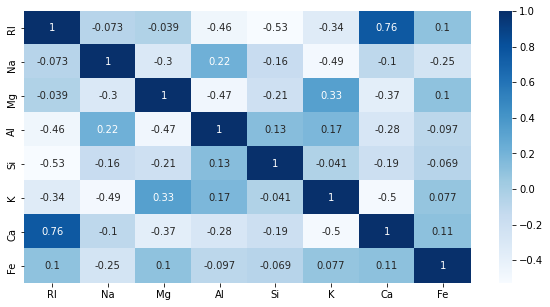

In [163]:
plt.figure(figsize = (10, 5));
# Get Correlations
df_corr = df.corr()

# Plot Heatmap
sns.heatmap(data = df_corr, annot = True, fmt='.2g', cmap='Blues');


We can see correlations among features
### Step 1: Find the significance of correlation

In [175]:
# H0 : Correlations are not significant
# H1 : There are significant correlations
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df.select_dtypes(include=np.number))
if p_value < 0.05:
    print(f"Correlations are significant )

Correlations are significant


### Step 2: Find if we have adequate sample

In [177]:
# Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df.select_dtypes(include=np.number))
kmo_model

0.47357661194601225

### Step 3: Calculate PCA

In [181]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 9, random_state = 123)
pca_transformed = pca.fit_transform(df)

In [182]:
# Extract Eigen vectors
pca.components_

array([[-0.08561722,  0.23991178, -0.32448524,  0.26762204,  0.08784888,
        -0.1260789 ,  0.01609592, -0.10908566,  0.84995749],
       [-0.56783962, -0.0971259 ,  0.15962933,  0.27788329,  0.27331676,
         0.41736169, -0.55962735, -0.05462603, -0.0190913 ],
       [ 0.02617622, -0.59725032, -0.30504165,  0.11092434,  0.39988897,
         0.1695672 ,  0.31656129,  0.49460934,  0.06114388],
       [ 0.19937128, -0.04281835,  0.04336578,  0.32004692, -0.71034919,
         0.47553236, -0.05171939,  0.32053335,  0.13402815],
       [ 0.19310137, -0.40626098, -0.10512231,  0.03944624, -0.03661961,
         0.35371655,  0.1860007 , -0.78924962,  0.03300847],
       [ 0.1550942 , -0.09918071,  0.36088935, -0.70652687,  0.09675636,
         0.29106742, -0.15046222,  0.11513263,  0.45465503],
       [-0.10575376,  0.33993017, -0.72484538, -0.39169707, -0.03274312,
         0.38590451, -0.07686367,  0.02432489, -0.19478727],
       [-0.54824574, -0.46245946, -0.16860428, -0.2844604 , -0

In [183]:
# Extract Eigen values
pca.explained_variance_

array([5.96290172, 2.48693856, 1.20730342, 1.07167661, 0.82669066,
       0.4262962 , 0.23082211, 0.13992619, 0.11675094])

In [184]:
pca.explained_variance_ratio_

array([0.47820637, 0.19944482, 0.09682202, 0.08594517, 0.06629805,
       0.03418764, 0.01851122, 0.01122165, 0.00936307])

In [185]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9'],
                                    index = df.columns)
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
RI,-0.085617,-0.567840,0.026176,0.199371,0.193101,0.155094,-0.105754,-0.548246,0.506650
Na,0.239912,-0.097126,-0.597250,-0.042818,-0.406261,-0.099181,0.339930,-0.462459,-0.264880
Mg,-0.324485,0.159629,-0.305042,0.043366,-0.105122,0.360889,-0.724845,-0.168604,-0.281384
Al,0.267622,0.277883,0.110924,0.320047,0.039446,-0.706527,-0.391697,-0.284460,0.036668
Si,0.087849,0.273317,0.399889,-0.710349,-0.036620,0.096756,-0.032743,-0.490491,0.026784
K,-0.126079,0.417362,0.169567,0.475532,0.353717,0.291067,0.385905,-0.350036,-0.271562
Ca,0.016096,-0.559627,0.316561,-0.051719,0.186001,-0.150462,-0.076864,-0.053694,-0.719476
Fe,-0.109086,-0.054626,0.494609,0.320533,-0.789250,0.115133,0.024325,-0.030589,0.006198
Type,0.849957,-0.019091,0.061144,0.134028,0.033008,0.454655,-0.194787,0.096373,-0.021797


In [186]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47820637, 0.67765119, 0.7744732 , 0.86041837, 0.92671642,
       0.96090406, 0.97941528, 0.99063693, 1.        ])

In [187]:
df_selected = df_extracted_loadings[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
df_selected

,PC1,PC2,PC3,PC4,PC5
RI,-0.085617,-0.567840,0.026176,0.199371,0.193101
Na,0.239912,-0.097126,-0.597250,-0.042818,-0.406261
Mg,-0.324485,0.159629,-0.305042,0.043366,-0.105122
Al,0.267622,0.277883,0.110924,0.320047,0.039446
Si,0.087849,0.273317,0.399889,-0.710349,-0.036620
K,-0.126079,0.417362,0.169567,0.475532,0.353717
Ca,0.016096,-0.559627,0.316561,-0.051719,0.186001
Fe,-0.109086,-0.054626,0.494609,0.320533,-0.789250
Type,0.849957,-0.019091,0.061144,0.134028,0.033008


In [205]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df)

In [206]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-2.056612,-1.538503,-1.817718,-0.030318,-0.029611
1,-1.549606,0.892152,-1.326607,-0.478702,-0.120937
2,-1.417267,1.415290,-0.903842,-0.862100,-0.149747
3,-1.882791,0.752149,-0.693998,-0.238897,0.439020
4,-1.802326,1.027395,-0.523486,-0.833856,0.304882
5,-2.031420,1.610412,1.379669,0.556546,-1.712198
6,-1.861390,0.932741,-0.510120,-0.881597,0.337221
7,-1.948833,0.865806,-0.301842,-1.112409,0.416235
8,-1.658461,0.030975,-1.601698,0.452685,0.158734
9,-1.968107,0.813267,0.446172,-0.195180,-0.439284


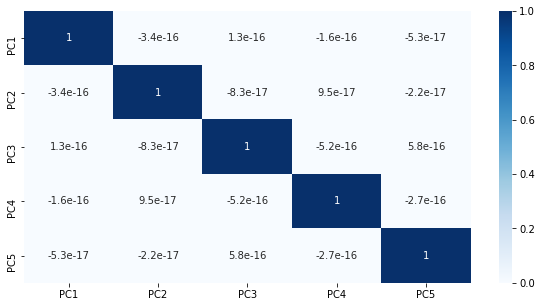

In [207]:
plt.figure(figsize = (10, 5));
# Get Correlations
df_corr = pca_final_df.corr()

# Plot Heatmap
sns.heatmap(data = df_corr, annot = True, fmt='.2g', cmap='Blues');

